# TP 3

In [2]:
import numpy as np
import graphinglib as gl
import matplotlib.pyplot as plt
import pandas as pd

## 3.1 : Décomposition QR par la méthode de Householder

### **a)** À l’aide des équations (3.2) et (3.3), démontrez que les matrices de réflexion $Q_i$ sont orthogonales.

$$
\begin{align*}
    Q_i &= \begin{bmatrix}
        I_i & 0 \\
        0 & H_{m,i}
    \end{bmatrix} \\
    H_{m,i} &= I_{m - i} - 2 \frac{v_{m,i} v_{m,i}^T}{v_{m,i}^T v_{m,i}}
\end{align*}
$$

$$
\begin{align*}
    Q_i^T &= \begin{bmatrix}
        I_i^T & 0 \\
        0 & H_{m,i}^T
    \end{bmatrix} \\
    &= \begin{bmatrix}
        I_i & 0 \\
        0 & I_{m - i}^T - 2 \left(\frac{v_{m,i} v_{m,i}^T}{v_{m,i}^T v_{m,i}}\right)^T 
    \end{bmatrix} \\
    &= \begin{bmatrix}
        I_i & 0 \\
        0 & I_{m - i} - 2 \frac{v_{m,i} v_{m,i}^T}{v_{m,i}^T v_{m,i}}
    \end{bmatrix} \\ &= Q_i
\end{align*}
$$

$$
\begin{align*}
    Q_i^T Q_i &= \begin{bmatrix}
        I_i & 0 \\
        0 & I_{m - i} - 2 \frac{v_{m,i} v_{m,i}^T}{v_{m,i}^T v_{m,i}}
    \end{bmatrix}
    \begin{bmatrix}
        I_i & 0 \\
        0 & I_{m - i} - 2 \frac{v_{m,i} v_{m,i}^T}{v_{m,i}^T v_{m,i}}
    \end{bmatrix} \\
    &= \begin{bmatrix}
        I_i^2 & 0 \\
        0 & I_{m - i}^2 - 4 I_{m - i} \frac{v_{m,i} v_{m,i}^T}{v_{m,i}^T v_{m,i}} + 4 \frac{v_{m,i} (v_{m,i}^T v_{m,i}) v_{m,i}^T}{(v_{m,i}^T v_{m,i})^2}
    \end{bmatrix} \\
    &= \begin{bmatrix}
        I_i & 0 \\
        0 & I_{m - i} - 4 \frac{v_{m,i} v_{m,i}^T}{v_{m,i}^T v_{m,i}} + 4 \frac{v_{m,i} v_{m,i}^T}{v_{m,i}^T v_{m,i}}
    \end{bmatrix} \\
    &= \begin{bmatrix}
        I_i & 0 \\
        0 & I_{m - i}
    \end{bmatrix} \\
    &= I_m
\end{align*}
$$

### **b)** Démontrez l’équation (3.5) et que la matrice $Q$ est orthogonale.

On dispose de l'équation:
$$
Q_{n - 1} Q_{n - 2} \cdots Q_1 Q_0A = R
$$
Et on désire obtenir une décomposition $QR$ de la forme:
$$ A = QR $$
Pour ce faire, on prémultiplie chaque côté de l'équation par $Q_{n - 1}^T$, puis par $Q_{n - 2}^T$, et ainsi de suite jusqu'à $Q_0^T$. Étant donné que $Q_i^TQ_i=I_m$, on obtient:
$$
\begin{align*}
    Q_{n - 1}^TQ_{n - 1} Q_{n - 2} \cdots Q_1 Q_0A &= Q_{n - 1}^T R \\
    I_m Q_{n - 2} \cdots Q_1 Q_0A &= Q_{n - 1}^T R \\
    Q_{n - 2}^TQ_{n - 2} \cdots Q_1 Q_0A &= Q_{n - 2}^T Q_{n - 1}^T R \\
    &\: \cdots \\
    A &= Q_0^T Q_1^T \cdots Q_{n - 2}^T Q_{n - 1}^TR \\
    \Rightarrow Q &= Q_0^T Q_1^T \cdots Q_{n - 2}^T Q_{n - 1}^T
\end{align*}
$$
Ce qui démontre l'équation (3.5). On veut ensuite montrer que la matrice $Q$ est orthogonale:
$$
\begin{align*}
    Q &= Q_0^T Q_1^T \cdots Q_{n - 2}^T Q_{n - 1}^T \\
    \Rightarrow Q^T &= (Q_0^T Q_1^T \cdots Q_{n - 2}^T Q_{n - 1}^T)^T \\
    &= Q_{n - 1} Q_{n - 2} \cdots Q_1 Q_0
\end{align*}
$$

$$
\begin{align*}
    Q^T Q &= (Q_{n - 1} Q_{n - 2} \cdots Q_1 Q_0) (Q_0^T Q_1^T \cdots Q_{n - 2}^T Q_{n - 1}^T) \\
    &= Q_{n - 1} Q_{n - 2} \cdots Q_1 Q_0 Q_0^T Q_1^T \cdots Q_{n - 2}^T Q_{n - 1}^T
\end{align*}
$$
En **a)**, on a démontré que $Q_i^T = Q_i$ et que $Q_i^T Q_i = I$. $Q_i^T$ est donc la matrice inverse de $Q_i$, ce qui veut dire qu'on a également $Q_iQ_i^T = I$. On peut alors annuler les termes à partir du centre dans l'expression pour $Q^T Q$ :
$$
\begin{align*}
    Q^T Q &= Q_{n - 1} Q_{n - 2} \cdots Q_1 (Q_0 Q_0^T) Q_1^T \cdots Q_{n - 2}^T Q_{n - 1}^T \\
    &= Q_{n - 1} Q_{n - 2} \cdots Q_1 I Q_1^T \cdots Q_{n - 2}^T Q_{n - 1}^T \\
    &= Q_{n - 1} Q_{n - 2} \cdots (Q_1 Q_1^T) \cdots Q_{n - 2}^T Q_{n - 1}^T \\
    &\: \cdots \\
    &= I
\end{align*}

### **c)** Implémentez la fonction `householder_qr` qui prend en argument une matrice $A$ et qui retourne les matrices $Q$ et $R$ obtenues par la méthode de Householder.

In [3]:
def householder_qr(A: np.ndarray) -> tuple[np.ndarray, np.ndarray]:
    """
    Performe une décomposition QR d'une matrice en utilisant la méthode de Householder

    Paramètres:
    -----------
    A (np.ndarray) : La matrice à décomposer

    Retourne:
    --------
    tuple[np.ndarray, np.ndarray]
        Un tuple contenant deux numpy arrays:
        - Q: La matrice orthogonale
        - R: La matrice triangulaire supérieure résultante
    """
    m, n = A.shape
    Q = np.eye(m)
    R = np.copy(A)
    for i in range(n):
        x = R[i:, i]
        e_1 = np.zeros(m - i)
        e_1[0] = 1
        v = np.sign(x[0]) * np.linalg.norm(x) * e_1 + x
        H = np.eye(m - i) - 2 * np.outer(v, v.T) / np.dot(v.T, v)
        Q_i = np.eye(m)
        Q_i[i:, i:] = H
        Q = np.dot(Q, Q_i.T)
        R = np.dot(Q_i, R)
    return Q, R

### **d)** À l’aide d’une matrice de dimension $4 \times 3$ de votre choix, testez votre fonction `householder_qr` et comparez les résultats obtenus avec ceux obtenus à l’aide de la fonction `numpy.linalg.qr`. Les matrices sont-elles exactement les mêmes ? Si non, est-ce un problème ?

In [4]:
A = np.array([[1, 2, 3],
              [4, 5, 6],
              [7, 8, 9],
              [10, 11, 12]])

Q, R = householder_qr(A)
print("householder_qr :", f'Q = {Q}', f'R = {R}', sep='\n')

Q, R = np.linalg.qr(A, mode='complete')
print("np.linalg.qr :", f'Q = {Q}', f'R = {R}', sep='\n')

householder_qr :
Q = [[-0.07761505 -0.83305216  0.1271286  -0.53276479]
 [-0.31046021 -0.45123659  0.22759462  0.80510912]
 [-0.54330537 -0.06942101 -0.83657505 -0.01192387]
 [-0.77615053  0.31239456  0.48185183 -0.26042046]]
R = [[-1.28840987e+01 -1.45916299e+01 -1.62991610e+01]
 [ 1.39795446e-15 -1.04131520e+00 -2.08263040e+00]
 [-6.92420769e-16  2.31249164e-17  1.42271586e-15]
 [ 8.51352996e-16  1.14653053e-16  4.42011077e-32]]
np.linalg.qr :
Q = [[-0.07761505 -0.83305216  0.5400942   0.09109478]
 [-0.31046021 -0.45123659 -0.78802363  0.28110274]
 [-0.54330537 -0.06942101 -0.04423532 -0.83548982]
 [-0.77615053  0.31239456  0.29216476  0.4632923 ]]
R = [[-1.28840987e+01 -1.45916299e+01 -1.62991610e+01]
 [ 0.00000000e+00 -1.04131520e+00 -2.08263040e+00]
 [ 0.00000000e+00  0.00000000e+00  1.12739058e-15]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00]]


Explication : En négligeant les termes de l'ordre de $10^{-15}$ ou moins, on constate que les matrices $R$ ainsi que les deux premières colonnes de $Q$ sont identiques. Les deux dernières colonnes de $Q$ sont différentes, mais puisque les deux dernières lignes de $R$ sont nulles, cela ne change rien au résultat $A=QR$. Cela n'est donc pas un problème, d'autant plus que selon les dimensions et le rang de la matrice $A$, la décomposition $QR$ n'est pas toujours unique.

### **e)** À l’aide de la matrice utilisée en **d**, illustrez comment la multiplication successive des matrices $Q_i$ triangularise progressivement la matrice $A$. Dans l’élan, assurez-vous que les matrices $Q$ et $R$ obtenues sont bien orthogonale et triangulaire supérieure, respectivement.

In [5]:
def householder_qr_successif(A: np.ndarray) -> tuple[np.ndarray, np.ndarray]:
    """
    Performe une décomposition QR d'une matrice en utilisant la méthode de Householder

    Paramètres:
    -----------
    A (np.ndarray) : La matrice à décomposer

    Retourne:
    --------
    tuple[np.ndarray, np.ndarray]
        Un tuple contenant deux numpy arrays:
        - Q: La matrice orthogonale
        - R: La matrice triangulaire supérieure résultante
    """
    print("A =", A)
    m, n = A.shape
    Q = np.eye(m)
    R = np.copy(A)
    for i in range(n):
        x = R[i:, i]
        e_1 = np.zeros(m - i)
        e_1[0] = 1
        v = np.sign(x[0]) * np.linalg.norm(x) * e_1 + x
        H = np.eye(m - i) - 2 * np.outer(v, v.T) / np.dot(v.T, v)
        Q_i = np.eye(m)
        Q_i[i:, i:] = H
        Q = np.dot(Q, Q_i.T)
        R = np.dot(Q_i, R)
        print(f"i = {i} : Q^T * A = \n{R}")

householder_qr_successif(A)

A = [[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]]
i = 0 : Q^T * A = 
[[-1.28840987e+01 -1.45916299e+01 -1.62991610e+01]
 [ 3.88578059e-16  2.19961998e-01  4.39923997e-01]
 [ 1.33226763e-15 -3.65066503e-01 -7.30133006e-01]
 [ 1.11022302e-15 -9.50095004e-01 -1.90019001e+00]]
i = 1 : Q^T * A = 
[[-1.28840987e+01 -1.45916299e+01 -1.62991610e+01]
 [ 1.39795446e-15 -1.04131520e+00 -2.08263040e+00]
 [ 1.04011178e-15  4.16911681e-17 -1.20275766e-15]
 [ 3.49879879e-16  1.09279142e-16  7.59930537e-16]]
i = 2 : Q^T * A = 
[[-1.28840987e+01 -1.45916299e+01 -1.62991610e+01]
 [ 1.39795446e-15 -1.04131520e+00 -2.08263040e+00]
 [-6.92420769e-16  2.31249164e-17  1.42271586e-15]
 [ 8.51352996e-16  1.14653053e-16  4.42011077e-32]]


On constate que la matrice $R$ obtenue à la dernière itération est bel et bien triangulaire supérieure, car tous les éléments en-dessous de la diagonale principale sont de l'ordre de $10^{-15}$ ou moins, ce qui est négligeable. De plus, on peut vérifier que la matrice $Q$ est bel et bien orthogonale:

In [6]:
Q, R = householder_qr(A)
verif = np.dot(Q.T, Q)
print("Q^T Q =", verif)

Q^T Q = [[ 1.00000000e+00 -2.09439297e-16  3.55472238e-17 -9.23131987e-17]
 [-2.09439297e-16  1.00000000e+00 -4.17209745e-17 -1.61063659e-16]
 [ 3.55472238e-17 -4.17209745e-17  1.00000000e+00  5.40583645e-17]
 [-9.23131987e-17 -1.61063659e-16  5.40583645e-17  1.00000000e+00]]


$Q^T Q$ est assez proche de la matrice identité de dimensions $4 \times 4$, puisque tous les éléments en dehors de la diagonale sont de l'ordre de $10^{-16}$ ou moins, ce qui est négligeable.

## 3.2 : Mesures imprécises dans un jeu de bataille navale

### **a)** Modifiez votre code de décomposition QR pour qu’il retourne la décomposition QR réduite de la matrice d’entrée lorsque l’argument additionnel `reduite=True` lui est passé.

In [7]:
def householder_qr(A: np.ndarray, reduite: bool=False) -> tuple[np.ndarray, np.ndarray]:
    """
    Performe une décomposition QR d'une matrice en utilisant la méthode de Householder

    Paramètres:
    -----------
    A (np.ndarray) : La matrice à décomposer
    reduite (bool) : Précise si la décomposition QR réduite est désirée. Par défaut, c'est False.

    Retourne:
    --------
    tuple[np.ndarray, np.ndarray]
        Un tuple contenant deux numpy arrays:
        - Q: La matrice orthogonale
        - R: La matrice triangulaire supérieure résultante
    """
    m, n = A.shape
    Q = np.eye(m)
    R = np.copy(A)
    for i in range(n):
        x = R[i:, i]
        e_1 = np.zeros(m - i)
        e_1[0] = 1
        v = np.sign(x[0]) * np.linalg.norm(x) * e_1 + x
        H = np.eye(m - i) - 2 * np.outer(v, v.T) / np.dot(v.T, v)
        Q_i = np.eye(m)
        Q_i[i:, i:] = H
        Q = np.dot(Q, Q_i.T)
        R = np.dot(Q_i, R)
    if reduite:
        Q, R = Q[:m, :n], R[:n, :n]
    return Q, R

Q, R = householder_qr(A, reduite=True)
print("householder_qr :", f'Q = {Q}', f'R = {R}', sep='\n')

Q, R = np.linalg.qr(A)
print("np.linalg.qr :", f'Q = {Q}', f'R = {R}', sep='\n')

householder_qr :
Q = [[-0.07761505 -0.83305216  0.1271286 ]
 [-0.31046021 -0.45123659  0.22759462]
 [-0.54330537 -0.06942101 -0.83657505]
 [-0.77615053  0.31239456  0.48185183]]
R = [[-1.28840987e+01 -1.45916299e+01 -1.62991610e+01]
 [ 1.39795446e-15 -1.04131520e+00 -2.08263040e+00]
 [-6.92420769e-16  2.31249164e-17  1.42271586e-15]]
np.linalg.qr :
Q = [[-0.07761505 -0.83305216  0.5400942 ]
 [-0.31046021 -0.45123659 -0.78802363]
 [-0.54330537 -0.06942101 -0.04423532]
 [-0.77615053  0.31239456  0.29216476]]
R = [[-1.28840987e+01 -1.45916299e+01 -1.62991610e+01]
 [ 0.00000000e+00 -1.04131520e+00 -2.08263040e+00]
 [ 0.00000000e+00  0.00000000e+00  1.12739058e-15]]


### **b)** Utilisez votre code pour résoudre approximativement l’équation (3.9). Vous utiliserez les données fournies dans le fichier `bataille_navale_equipe0XX.csv` où vous remplacerez 0XX par votre numéro d’équipe dans la boîte de dépôt sur MonPortail.

In [11]:
donnees = pd.read_csv('devoirs/tp3/bataille_navale_donnees_2025/bataille_navale_equipe010.csv')
x, Y = np.array(donnees['x']), np.array(donnees['y'])
X = np.array([np.ones(len(x)), x, x**2]).T
Q, R = householder_qr(X, reduite=True)

def retrosubstitution(A: np.ndarray, b: np.ndarray) -> np.ndarray:
    m, n = A.shape
    x = np.empty(m)
    for i in range(m-1, -1, -1):
        x[i] = b[i]/A[i,i]
        for j in range(i+1, n):
            x[i] -= A[i,j]/A[i,i]*x[j]
    return x

alpha = retrosubstitution(R, np.dot(Q.T, Y))

### **c)** Tracez les données (cercles noirs) et la solution estimée de la trajectoire(ligne pleine de la couleur de votre choix) donnée par l’équation (3.8)

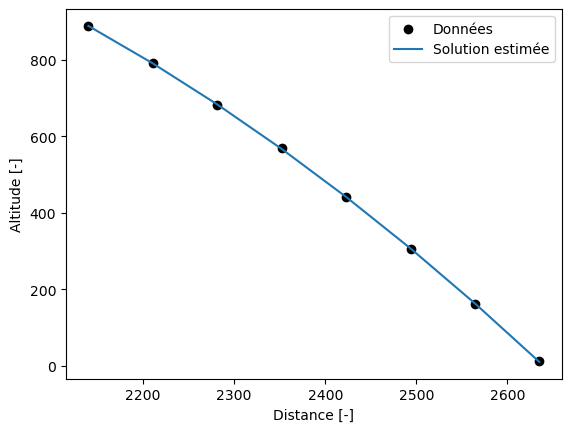

In [9]:
plt.scatter(x, Y, c='black', label='Données')
plt.plot(x, np.dot(X, alpha), label='Solution estimée')
plt.legend()
plt.xlabel('Distance [-]')
plt.ylabel('Altitude [-]')
plt.show()

### **d)** Obtenez la position d’impact du projectile (à $y = 0$) en résolvant l’équation quadratique (3.8) pour $x$ à l’aide d’une implémentation personnelle de la méthode de la bissection. Comparez votre solution avec celle obtenue en résolvant cette même équation analytiquement. Considérant que votre embarcation se situe à la position $(x,y) = (0,0)$, quelle est la distance horizontale vous séparant du point d’impact ?

In [25]:
def f(x):
    return np.dot(alpha, np.array([1, x, x**2]))

def bissection(xA, xB, precision=10**(-8)):
    valeurs = [0]
    erreur = 1
    while np.abs(erreur) > precision :
        xM = (xA+xB)/2
        valeurs.append(xM)
        erreur = valeurs[-1]-valeurs[-2]
        if f(xA)*f(xM) > 0:
            xA = xM
        elif f(xB)*f(xM) > 0 :
            xB = xM
        else:
            raise
    return valeurs[-1]

print(f"Position d'impact du projectile: {bissection(2000, 3000)}")

Position d'impact du projectile: 2639.5674684245023


Le code suivant permet d'obtenir analytiquement le point d'impact du projectile (en $x$), qui correspond également à la distance horizontale séparant l'embarcation du point d'impact, car l'embarcation se situe à l'origine du système de coordonnées.

In [21]:
c, b, a = alpha
rad = np.sqrt(b**2-4*a*c)
x1, x2 = (-b-rad)/(2*a), (-b+rad)/(2*a)
position = max(x1, x2)
print(f"Position d'impact du projectile: {position}\nDistance horizontale: {position}")

Position d'impact du projectile: 2639.5674684226474
Distance horizontale: 2639.5674684226474


## 3.3 : Modèle épidemiologique SIR sur réseau

### **a)** Trouvez analytiquement toutes les solutions de l’équation cubique (3.14).

### **b)** Démontrez laquelle des solutions obtenues précédemment (ou une combinaison de celles-ci) correspond à $u$, soit la solution recherchée de l’équation (3.14).

### **c)** Tracez $R_\infty$ en fonction de $T$ et identifiez tout changement qualitatif de $R_\infty$. Comment interprétez-vous ce changement (ou cette absence de changement) ?

### **d)** Résolvez numériquement l’équation (3.14) à l’aide d’implémentations personnelles de la méthode par relaxation et de la méthode de Newton-Raphson pour 20 valeurs de $T$ uniformément distribuées dans l’intervalle $[0,1]$. Illustrez vos résultats à l’aide d’un graphique comparant les solutions analytiques (indiquées avec des lignes de couleurs distinctes) aux solutions numériques obtenues avec différentes valeurs initiales de l’algorithme (symboles ; choisissez bien vos symboles pour que vos solutions soient bien visibles). Arrivez-vous à obtenir les trois solutions identifiées en a ? Pourquoi ? Considérez tracer l’équation (3.14) de même que la dérivée de $f(u)$ en fonction de u et ce, pour quelques valeurs de $T$, pour appuyer vos conclusions. Vous pouvez aussi tracer les itérations successives de chacune des méthodes afin d’illustrer la manière dont elles convergent vers l’une ou l’autre des solutions (ex. : tracer un diagramme en toile d’araignée).
